In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keysCopy1 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['maragogi',
 'poronaysk',
 'yar-sale',
 'loa janan',
 'yellowknife',
 'busselton',
 'buanoy',
 'tumannyy',
 'padang',
 'bambous virieux',
 'vaini',
 'bargal',
 'porto novo',
 'svetlyy',
 'qaanaaq',
 'tuktoyaktuk',
 'norman wells',
 'airai',
 'arraial do cabo',
 'butaritari',
 'hobart',
 'warqla',
 'ushuaia',
 'rikitea',
 'daurala',
 'nhulunbuy',
 'yala',
 'bathsheba',
 'kijabe',
 'cabo san lucas',
 'hithadhoo',
 'belle fourche',
 'new norfolk',
 'palmer',
 'bengkulu',
 'san rafael del sur',
 'dingle',
 'kuhdasht',
 'atuona',
 'bethel',
 'poum',
 'khani',
 'kapaa',
 'east london',
 'broome',
 'mercedes',
 'mys shmidta',
 'okha',
 'torbay',
 'kizukuri',
 'vestmannaeyjar',
 'tiksi',
 'iqaluit',
 'hermanus',
 'albany',
 'taolanaro',
 'khonuu',
 'senno',
 'kodiak',
 'kadykchan',
 'tiznit',
 'coquimbo',
 'port macquarie',
 'upernavik',
 'mitchell',
 'saint george',
 'hamilton',
 'luanda',
 'belushya guba',
 'cantapoy',
 'yulara',
 'dikson',
 'puerto ayora',
 'luderitz',
 'genhe',
 'sampit',

In [3]:
#Perform a weather check on each city using a series of successive API calls
#Include a print log of each city as its being processed
lat = []
citynames = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print('Beginning Data Retrieval')
print('------------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cityname = response['name']
        citynames.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print('City not found. Skipping...')
    index = cities.index(city) + 1
    setnumber = np.floor(1 + (index/50))
    if setnumber > 1:
        index = index - (setnumber - 1) * 50
    print(f'Processing Record {index} of Set {setnumber} | {city}')
    
#response = requests.get(query_url + cities[0]).json()
#print(json.dumps(response, indent= 4, sort_keys=True))



Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1.0 | maragogi
Processing Record 2 of Set 1.0 | poronaysk
Processing Record 3 of Set 1.0 | yar-sale
Processing Record 4 of Set 1.0 | loa janan
Processing Record 5 of Set 1.0 | yellowknife
Processing Record 6 of Set 1.0 | busselton
Processing Record 7 of Set 1.0 | buanoy
City not found. Skipping...
Processing Record 8 of Set 1.0 | tumannyy
Processing Record 9 of Set 1.0 | padang
Processing Record 10 of Set 1.0 | bambous virieux
Processing Record 11 of Set 1.0 | vaini
City not found. Skipping...
Processing Record 12 of Set 1.0 | bargal
Processing Record 13 of Set 1.0 | porto novo
Processing Record 14 of Set 1.0 | svetlyy
Processing Record 15 of Set 1.0 | qaanaaq
Processing Record 16 of Set 1.0 | tuktoyaktuk
Processing Record 17 of Set 1.0 | norman wells
Processing Record 18 of Set 1.0 | airai
Processing Record 19 of Set 1.0 | arraial do cabo
Processing Record 20 of Set 1.0 | butaritari
Processing Record 21

Processing Record 26.0 of Set 4.0 | kudahuvadhoo
Processing Record 27.0 of Set 4.0 | ancud
Processing Record 28.0 of Set 4.0 | mar del plata
Processing Record 29.0 of Set 4.0 | clyde river
Processing Record 30.0 of Set 4.0 | sao filipe
Processing Record 31.0 of Set 4.0 | san patricio
Processing Record 32.0 of Set 4.0 | isla vista
Processing Record 33.0 of Set 4.0 | andenes
Processing Record 34.0 of Set 4.0 | rundu
Processing Record 35.0 of Set 4.0 | lompoc
Processing Record 36.0 of Set 4.0 | blagoyevo
Processing Record 37.0 of Set 4.0 | te anau
Processing Record 38.0 of Set 4.0 | belize
City not found. Skipping...
Processing Record 39.0 of Set 4.0 | balimo
Processing Record 40.0 of Set 4.0 | khatanga
Processing Record 41.0 of Set 4.0 | naze
Processing Record 42.0 of Set 4.0 | anadyr
Processing Record 43.0 of Set 4.0 | qostanay
City not found. Skipping...
Processing Record 44.0 of Set 4.0 | tidore
Processing Record 45.0 of Set 4.0 | izberbash
Processing Record 46.0 of Set 4.0 | cape tow

Processing Record 48.0 of Set 7.0 | moron
Processing Record 49.0 of Set 7.0 | kloulklubed
Processing Record 0.0 of Set 8.0 | bereda
Processing Record 1.0 of Set 8.0 | berdigestyakh
Processing Record 2.0 of Set 8.0 | falun
Processing Record 3.0 of Set 8.0 | aksu
Processing Record 4.0 of Set 8.0 | xihe
Processing Record 5.0 of Set 8.0 | sur
Processing Record 6.0 of Set 8.0 | vila velha
Processing Record 7.0 of Set 8.0 | margate
Processing Record 8.0 of Set 8.0 | hakkari
Processing Record 9.0 of Set 8.0 | coihaique
City not found. Skipping...
Processing Record 10.0 of Set 8.0 | marcona
Processing Record 11.0 of Set 8.0 | ponta delgada
Processing Record 12.0 of Set 8.0 | alyangula
Processing Record 13.0 of Set 8.0 | ribas do rio pardo
Processing Record 14.0 of Set 8.0 | killybegs
Processing Record 15.0 of Set 8.0 | maceio
Processing Record 16.0 of Set 8.0 | shache
Processing Record 17.0 of Set 8.0 | pandan
Processing Record 18.0 of Set 8.0 | leningradskiy
Processing Record 19.0 of Set 8.0 

Processing Record 25.0 of Set 11.0 | cervo
Processing Record 26.0 of Set 11.0 | labrea
Processing Record 27.0 of Set 11.0 | san andres
Processing Record 28.0 of Set 11.0 | jenison
Processing Record 29.0 of Set 11.0 | conceicao da barra
Processing Record 30.0 of Set 11.0 | santa cruz
Processing Record 31.0 of Set 11.0 | vostok
Processing Record 32.0 of Set 11.0 | meadow lake
Processing Record 33.0 of Set 11.0 | celestun
Processing Record 34.0 of Set 11.0 | rimini
Processing Record 35.0 of Set 11.0 | chupa
Processing Record 36.0 of Set 11.0 | ugoofaaru
Processing Record 37.0 of Set 11.0 | luoyang
Processing Record 38.0 of Set 11.0 | zar
Processing Record 39.0 of Set 11.0 | murmashi
Processing Record 40.0 of Set 11.0 | tawau
Processing Record 41.0 of Set 11.0 | tura
Processing Record 42.0 of Set 11.0 | gizo
Processing Record 43.0 of Set 11.0 | sabang
Processing Record 44.0 of Set 11.0 | zhanaozen
Processing Record 45.0 of Set 11.0 | mahebourg
Processing Record 46.0 of Set 11.0 | hellin
Pr

In [4]:
weather_df = pd.DataFrame({
    'City' : citynames,
    'Latitude' : lat,
    'Longitude' : lng,
    'Max Temperature (F)' : maxtemp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : windspeed,
    'County' : country,
    'Date' : date
})
weather_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,County,Date
0,Maragogi,-9.0122,-35.2225,25.56,84,46,4.00,BR,1652560648
1,Poronaysk,49.2167,143.1167,2.99,82,100,7.77,RU,1652560649
2,Yar-Sale,66.8333,70.8333,1.84,100,100,4.28,RU,1652560649
3,Loa Janan,-0.5830,117.0950,23.56,99,100,0.69,ID,1652560650
4,Yellowknife,62.4560,-114.3525,15.31,26,75,6.71,CA,1652560650


In [5]:
weather_df.to_csv('weather_data_cities.csv', encoding = 'utf-8', index = False)

In [6]:
weather_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.939156,20.734018,18.063748,70.430052,57.737478,3.528290,1.652561e+09
std,33.073692,90.117641,10.171710,23.014435,39.460551,2.509703,1.039684e+02
min,-54.800000,-179.166700,-12.900000,1.000000,0.000000,0.000000,1.652560e+09
25%,-6.196400,-59.036050,11.095000,58.000000,16.500000,1.655000,1.652561e+09
50%,26.002300,26.891000,19.080000,76.000000,72.000000,3.090000,1.652561e+09
75%,48.791650,98.974500,26.260000,87.500000,99.000000,4.630000,1.652561e+09
max,78.218600,179.316700,39.800000,100.000000,100.000000,13.760000,1.652561e+09


In [7]:
weather_df.loc[(weather_df['Humidity'] > 100), :].head()
#no cities with humidity greater than 100%

,City,Latitude,Longitude,Max Temperature (F),Humidity,Cloudiness,Wind Speed,County,Date


<AxesSubplot:title={'center':'City Latitude vs. Max Temperature (05/15/22)'}, xlabel='Latitude', ylabel='Max Temperature (F)'>

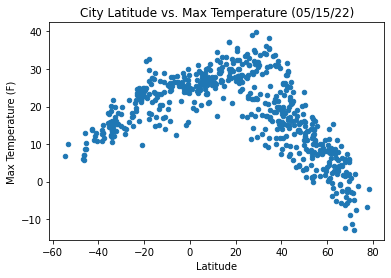

In [8]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Max Temperature (F)', title = 'City Latitude vs. Max Temperature (05/15/22)')

<AxesSubplot:title={'center':'City Latitude vs. Humidity (05/15/22)'}, xlabel='Latitude', ylabel='Humidity'>

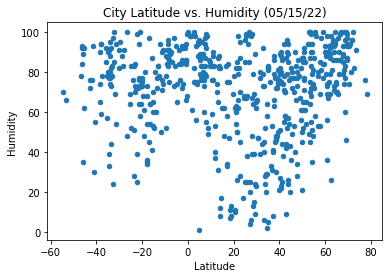

In [9]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Humidity', title = 'City Latitude vs. Humidity (05/15/22)')

<AxesSubplot:title={'center':'City Latitude vs. Cloudiness (05/15/22)'}, xlabel='Latitude', ylabel='Cloudiness'>

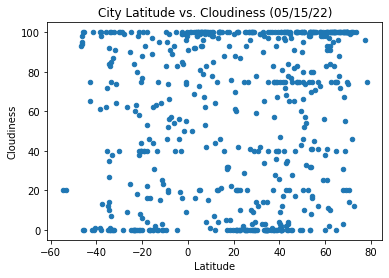

In [10]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Cloudiness', title = 'City Latitude vs. Cloudiness (05/15/22)')

<AxesSubplot:title={'center':'City Latitude vs. Wind Speed (05/15/22)'}, xlabel='Latitude', ylabel='Wind Speed'>

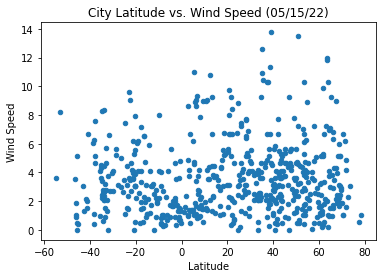

In [11]:
weather_df.plot(kind = 'scatter', x = 'Latitude', y = 'Wind Speed', title = 'City Latitude vs. Wind Speed (05/15/22)')

In [12]:
northern_df = weather_df.loc[(weather_df['Latitude'] >= 0), :]
southern_df = weather_df.loc[(weather_df['Latitude'] <= 0), :]

R squared: 0.6610940123246837


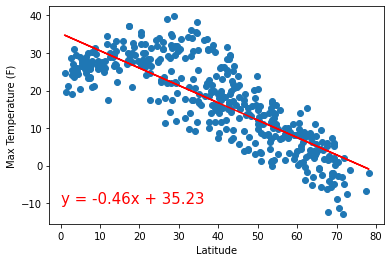

In [13]:
#Northern Hemisphere - Temperature (F) vs. Latitude
x_values = northern_df['Latitude'].astype('float')
y_values = northern_df['Max Temperature (F)'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (0,-10), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f'R squared: {rvalue**2}')

plt.show()

# Temperature is negatively correlated to Latitude in the northern hemisphere

R squared: 0.5879014506839684


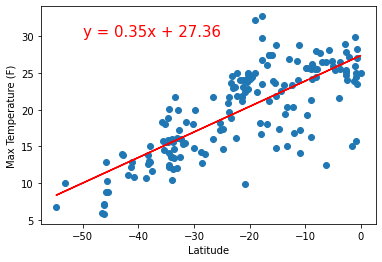

In [21]:
x_values = southern_df['Latitude'].astype('float')
y_values = southern_df['Max Temperature (F)'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 30), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f'R squared: {rvalue**2}')

plt.show()

#Temperature is positively correlated with latitude in the southern hemisphere

R squared: 0.03963796593659273


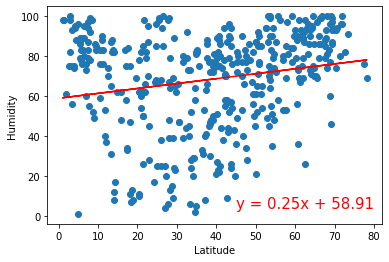

In [15]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_df['Latitude'].astype('float')
y_values = northern_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (45,4), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f'R squared: {rvalue**2}')

plt.show()

#Humidity is positively correlated with latitude in the northwern hempisphere

R squared: 0.01737267933136703


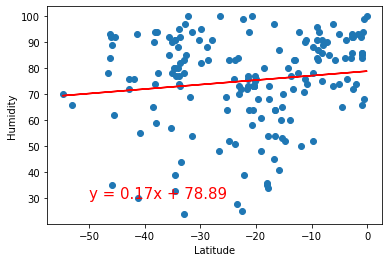

In [22]:
x_values = southern_df['Latitude'].astype('float')
y_values = southern_df['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 30), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f'R squared: {rvalue**2}')

plt.show()

#Humidity is slightly positively correlated with latitude in the southern hemisphere

R squared: 0.009575377048042795


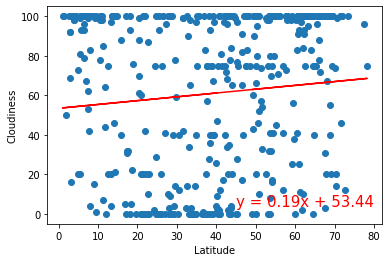

In [17]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_df['Latitude'].astype('float')
y_values = northern_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (45,4), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'R squared: {rvalue**2}')

plt.show()

#Cloudiness is slightly correlated with latitude in the northern hemisphere

R squared: 0.00622845726698571


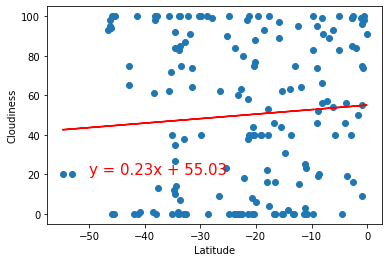

In [18]:
x_values = southern_df['Latitude'].astype('float')
y_values = southern_df['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 20), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'R squared: {rvalue**2}')

plt.show()
#Cloudiness is slightly positively correlated with latitude in the southern hemisphere

R squared: 0.0017298663685026917


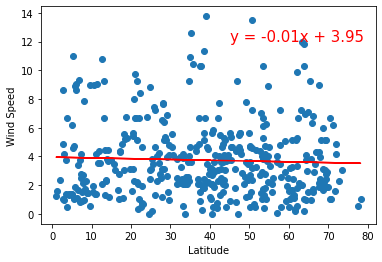

In [19]:
x_values = northern_df['Latitude'].astype('float')
y_values = northern_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (45,12), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'R squared: {rvalue**2}')

plt.show()

#Wind speed is not correlated to latitude

R squared: 0.04708320106891654


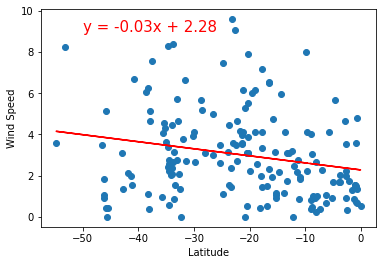

In [23]:
x_values = southern_df['Latitude'].astype('float')
y_values = southern_df['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))

plt.scatter(x_values, y_values)

plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-50, 9), fontsize = 15, color = 'red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'R squared: {rvalue**2}')

plt.show()

#wind speed is slightly negatively correlated with Latitude in the southern hemisphere